In [ ]:

import numpy as np  
import pandas as pd 


In [ ]:
df = pd.read_csv('startup_funding.csv')

df.head()

In [ ]:
df['Startup Name'].unique()

In [ ]:
df[df['Investors Name'].isna()]

In [ ]:
df['Investors Name'].unique()

In [ ]:
df.info()

In [ ]:
df.drop(columns=['Remarks'],inplace=True)

In [ ]:
df.set_index('Sr No',inplace = True)

In [ ]:
df.rename(columns = {
    'Date dd/mm/yyyy': 'date',
    'Startup Name':'startup',
    'Industry Vertical': 'vertical',
    'SubVertical':'subvertical',
    'City  Location':'city',
    'Investors Name':'investor',
    'InvestmentnType':'round',
    'Amount in USD':'amount'
},inplace = True)

In [ ]:
df['amount'] = df['amount'].fillna('0')
df['amount'] = df['amount'].str.replace(',','0')
df['amount'] = df['amount'].str.replace('undisclosed','0')
df['amount'] = df['amount'].str.replace('Undisclosed','0')
df['amount'] = df['amount'].str.replace('unknown','0')


In [ ]:
df = df[df['amount'].str.isdigit()]
# df = df[df['amount'].astype(str).str.isdigit()]
df

In [ ]:
df['amount'] = df['amount'].astype('float')

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df['amount'] = df['amount'].fillna('0')

df.info()

In [ ]:
def to_inr(dollar):
    inr = dollar * 87.24
    return inr / 1e7  # Convert to INR Crores

to_inr(2000000000)

In [ ]:
df['amount'] = df['amount'].apply(to_inr) 

In [ ]:
df['amount'] = df['amount'] * 87.24 / 1e7


In [ ]:
df['amount']

In [ ]:
df.head(3)

In [ ]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')

# df['date'] = pd.to_datetime(df["date"], errors='coerce')

In [ ]:
pd.to_datetime(df["date"])


In [ ]:
df[pd.to_datetime(df["date"]).isna()]

In [ ]:
 
df.info()


In [ ]:
df['date'].dt.month

In [ ]:
df = df.dropna(subset=['date','startup','vertical','city','investor','round','amount'])

In [ ]:
df.info()

In [ ]:
df.to_csv('startup_cleaned.csv',index=False)

In [ ]:
df['investor'].str.split(',').sum()

In [ ]:
sorted(set(df['investor'].str.split(',').sum()))

In [ ]:
df['investor']

In [ ]:
df.groupby('investor')['investor'].count().sort_values(ascending = False)['IDG Ventures']

In [ ]:
# df[df["investor"].str.contains("Ratan Tata")][['date','startup','vertical','city','round','amount']]
df[df["investor"].str.contains("IDG Ventures")][['date','startup','vertical','city','round','amount']]

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
big_df = df[df["investor"].str.contains("3one4 Capital")].groupby('startup')['amount'].sum().sort_values(ascending = False).head(5)
big_df

In [ ]:
df[df["investor"].str.contains("3one4 Capital")].groupby('vertical')['amount'].sum().plot(kind = 'pie')

C:\Users\user\AppData\Local\Temp\ipykernel_6624\3581745611.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['date'].dt.year


<Axes: xlabel='year'>

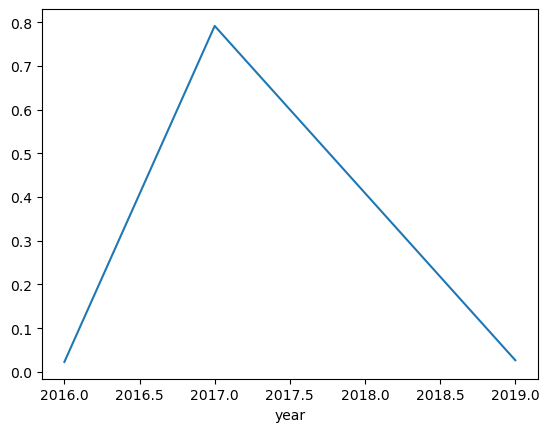

In [89]:
df['year'] = df['date'].dt.year
df
# df[df["investor"].str.contains("3one4 Capital")].groupby('year')['amount'].sum().plot(kind = 'pie')
df[df["investor"].str.contains("3one4 Capital")].groupby('year')['amount'].sum().plot()